Use PCA to the dimensionality of a 2D dataset and visualize how much variance is captured

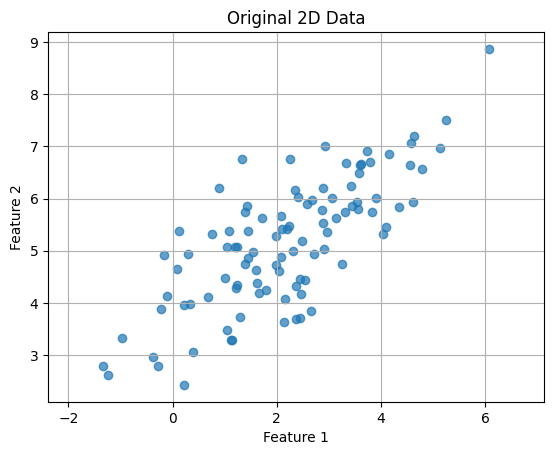

In [1]:
#1: plotting random and observing the 2d distribution.
import numpy as np
import matplotlib.pyplot as plt
# Step 1: Generate a 2D dataset
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

In [2]:
# Center the data (subtract mean from each feature)
X_centered = X - np.mean(X, axis=0)

In [3]:
# Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

In [4]:
#Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

In [5]:
#Project the data onto the first principal component
first_pc = eigenvectors[:, 0]
x_pca_1d = X_centered.dot(first_pc)

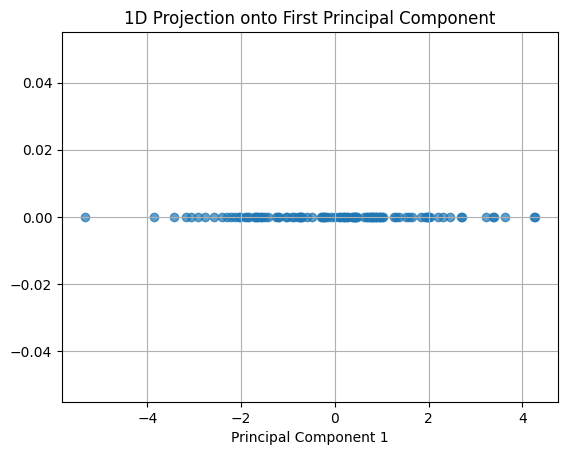

In [6]:
# Step 6: Plot 1D projection
plt.scatter(x_pca_1d, np.zeros_like(x_pca_1d), alpha=0.7)
plt.title("1D Projection onto First Principal Component")
plt.xlabel("Principal Component 1")
plt.grid(True)
plt.show()

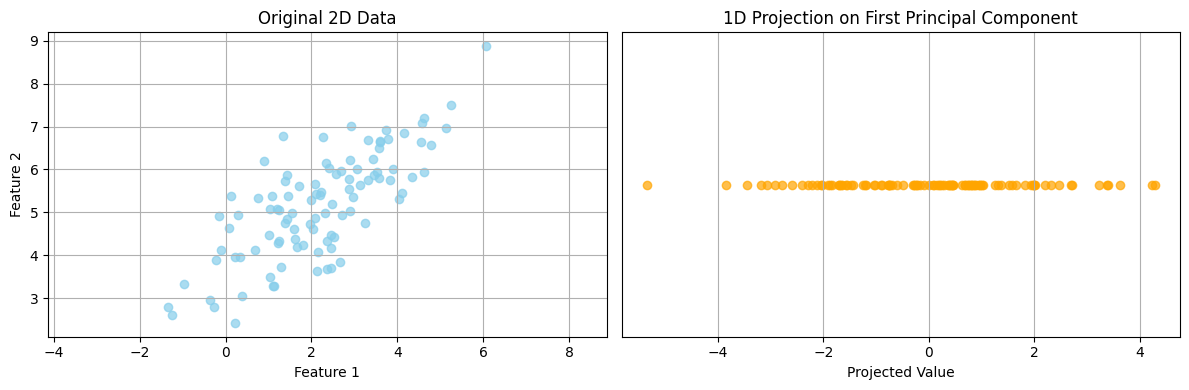

In [7]:
# Comparison between 2d and 1d
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].scatter(X[:, 0], X[:, 1], alpha=0.7, color='skyblue')
axs[0].set_title("Original 2D Data")
axs[0].set_xlabel("Feature 1")
axs[0].set_ylabel("Feature 2")
axs[0].axis("equal")
axs[0].grid(True)

axs[1].scatter(x_pca_1d, np.zeros_like(x_pca_1d), alpha=0.7, color='orange')
axs[1].set_title("1D Projection on First Principal Component")
axs[1].set_xlabel("Projected Value")
axs[1].set_yticks([])
axs[1].grid(True)

plt.tight_layout()
plt.show()

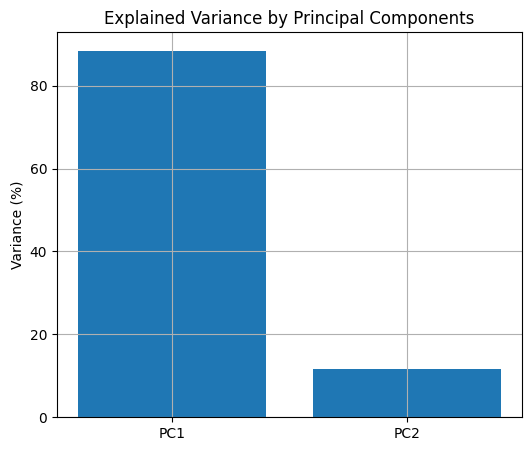

In [8]:
#Plot the amount of variance explained by each component
variance_explained = eigenvalues / np.sum(eigenvalues)

plt.figure(figsize=(6, 5))
plt.bar(["PC1", "PC2"], variance_explained * 100)
plt.title("Explained Variance by Principal Components")
plt.ylabel("Variance (%)")
plt.grid(True)
plt.show()

#PART 2
Use t-SNE to visualize how it separates points from different classes in 2D space.

In [9]:
#Inspect the shape of X and y.
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

# Load data
digits = load_digits()
X = digits.data
y = digits.target

# Inspect shape
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

#64 features represen the brightness of each pixel in the handwritten picture


Shape of X: (1797, 64)
Shape of y: (1797,)


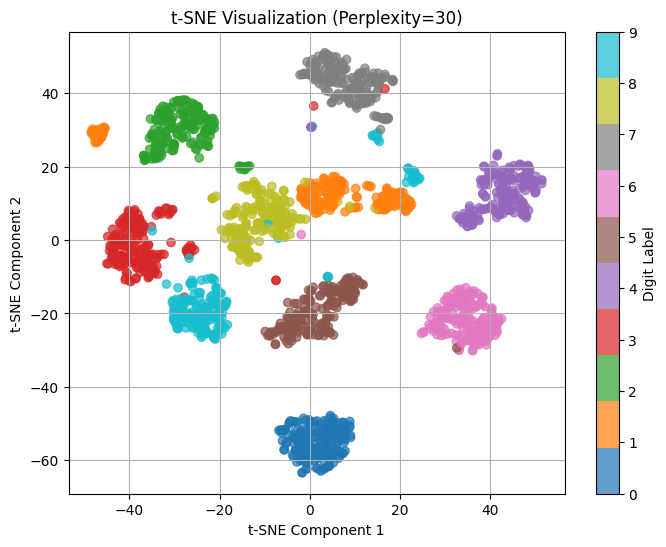

In [10]:
#Apply t-SNE and visualize with perplexity=30
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize the result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.title("t-SNE Visualization (Perplexity=30)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()


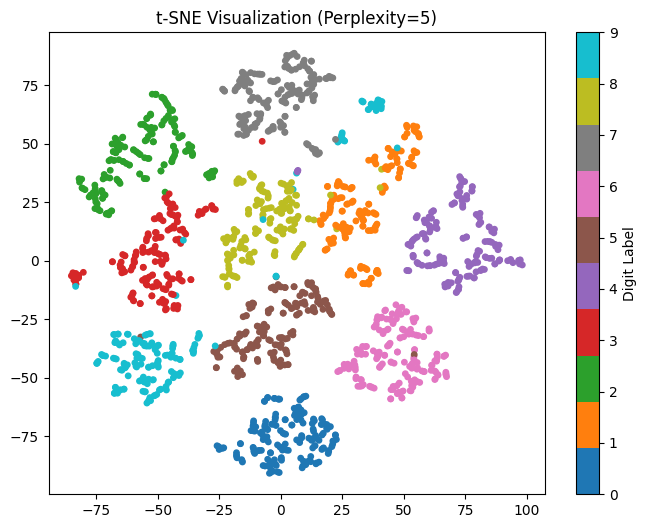

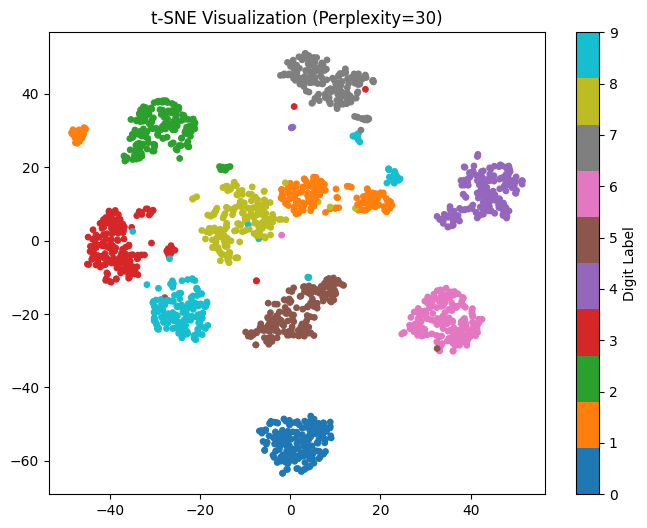

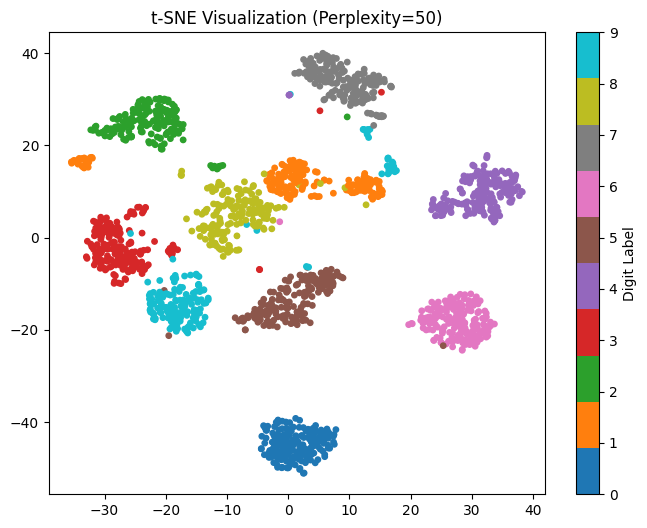

In [11]:
#Try Different Perplexity Values:
perplexities = [5, 30, 50]
for perp in perplexities:
    tsne = TSNE(n_components=2, random_state=42, perplexity=perp)
    X_embedded = tsne.fit_transform(X)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', s=15)
    plt.colorbar(scatter, label='Digit Label')
    plt.title(f't-SNE Visualization (Perplexity={perp})')
    plt.show()
